<a href="https://colab.research.google.com/github/edlorencetti/Curso-Ci-ncia-de-dados/blob/master/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

Importando arquivo de dados

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [0]:
credito = pd.read_csv('Credit.csv')
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:,20].values

In [0]:
labelencoder = LabelEncoder()

Mudando os dados catgóricos para numéricos

In [0]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [0]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

Fazendo o treinamento dos dados do arquivo

In [0]:
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(x_treinamento, y_treinamento)
previsoes = floresta.predict(x_teste)
confusao = confusion_matrix(y_teste, previsoes)

Verificando taxa de acertos

In [8]:
acerto = accuracy_score(y_teste,previsoes)
acerto

0.7866666666666666

In [9]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


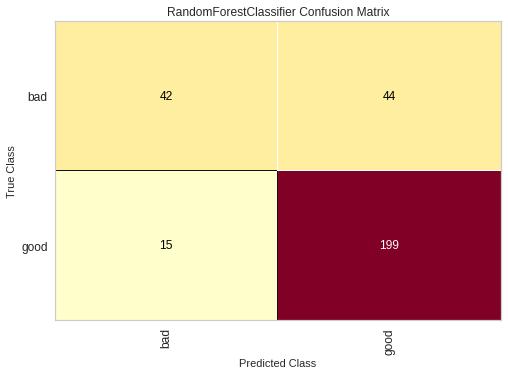

In [10]:
v = ConfusionMatrix(RandomForestClassifier(n_estimators=100))
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

Podemos buscar qualquer uma das árvores geradas pelo RandomForestClassifier
Exemplo teste 13 (lembrando que os índices no python começam no 0)

In [11]:
floresta.estimators_[12]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1174255591, splitter='best')